In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseDrugDF = pd.read_csv(mouse_drug_data_to_load)
trialDF = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouseTrialsDF = pd.merge(trialDF, mouseDrugDF, how = "left", on = ["Mouse ID"])

# Display the data table for preview
mouseTrialsDF.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorVolumeByDrug = mouseTrialsDF.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumorVolumeByDrug = pd.DataFrame(tumorVolumeByDrug).reset_index()
# Preview DataFrame
tumorVolumeByDrug.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stdErrorTumorVol = mouseTrialsDF.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
stdErrorTumorVol = pd.DataFrame(stdErrorTumorVol).reset_index()
# Preview DataFrame
stdErrorTumorVol.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumorVolVsTime = tumorVolumeByDrug.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
stdErrVsTime = stdErrorTumorVol.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


# Preview that Reformatting worked
stdErrVsTime.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


No handles with labels found to put in legend.


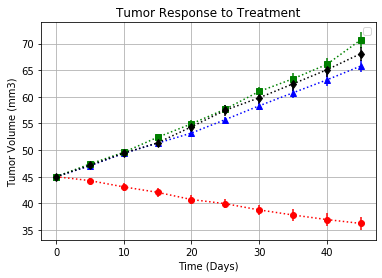

In [5]:
drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plotStyleDict = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

# Generate the Plot (with Error Bars)

fig1, ax1 = plt.subplots()
for drug in drugList:
    ax1.errorbar(tumorVolVsTime.index, tumorVolVsTime[drug], stdErrVsTime[drug], fmt = plotStyleDict[drug])
ax1.legend()
plt.grid(True)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Save the Figure
plt.savefig("TumorResponseToTreatment.png")
plt.show()


In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastaticSitesByDrug = mouseTrialsDF.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean()
# Convert to DataFrame
metastaticSitesByDrug= pd.DataFrame(metastaticSitesByDrug).reset_index()
# Preview DataFrame
metastaticSitesByDrug.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stdErrorMetastaticSites = mouseTrialsDF.groupby(["Drug", "Timepoint"])['Metastatic Sites'].sem()
# Convert to DataFrame
stdErrorMetastaticSites = pd.DataFrame(stdErrorMetastaticSites).reset_index()
# Preview DataFrame
stdErrorMetastaticSites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
metastaticSitesbyTime = metastaticSitesByDrug.pivot(index='Timepoint', columns="Drug", values="Metastatic Sites")
stdErrorMetastaticSites = stdErrorMetastaticSites.pivot(index= 'Timepoint', columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
metastaticSitesbyTime

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

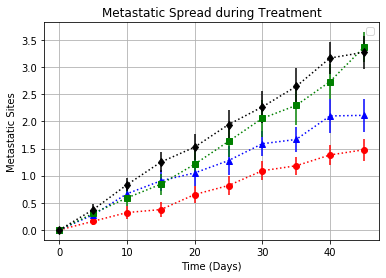

In [10]:
# Generate the Plot (with Error Bars)

fig2, ax2 = plt.subplots()
for drug in drugList:
    ax2.errorbar(metastaticSitesbyTime.index, metastaticSitesbyTime[drug],
             stdErrorMetastaticSites[drug], fmt=plotStyleDict[drug])

ax2.legend()
plt.grid(True)
plt.title('Metastatic Spread during Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')

# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")

# Show the Figure
plt.show

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouseSurvival = mouseTrialsDF.groupby(["Drug", "Timepoint"])['Mouse ID'].count()

# Convert to DataFrame
mouseSurvival = pd.DataFrame(mouseSurvival).reset_index()
mouseSurvival = mouseSurvival.rename(columns = {"Mouse ID":"Mouse Count"})

# Preview DataFrame
mouseSurvival.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouseSurvivalByTime = mouseSurvival.pivot (index = "Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
mouseSurvivalByTime

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


No handles with labels found to put in legend.


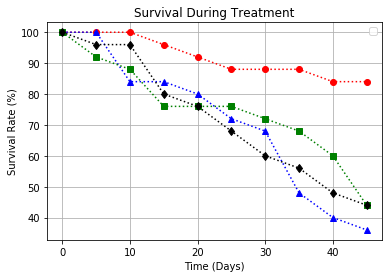

In [13]:
# Generate the Plot (Accounting for percentages)

mouseSurvivalRate = pd.DataFrame()
for col in mouseSurvivalByTime.columns:
    mouseSurvivalRate[col] = 100 * mouseSurvivalByTime[col]/25

fig3, ax3 = plt.subplots()
for drug in drugList:
    plt.plot(mouseSurvivalRate.index, mouseSurvivalRate[drug], plotStyleDict[drug])
plt.grid(True)
ax3.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percentChangeStudyPeriod = (tumorVolVsTime.iloc[9, :] - tumorVolVsTime.iloc[0,:])/tumorVolVsTime.iloc[0,:] * 100

# Display the data to confirm
print(percentChangeStudyPeriod)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


In [15]:
percentChange = percentChangeStudyPeriod.to_frame()
percentChange = percentChange.rename(columns = {0 : "Percent Change"})
percentChange["Pass"] = (percentChange < 0)

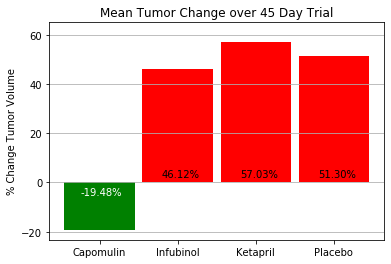

In [16]:
fig4, ax4 = plt.subplots()
x = 0

for drug in drugList:
    y = percentChange.loc[drug, "Percent Change"]
    if percentChange.loc[drug, "Pass"] == True:
        ax4.bar(drug, y, width = .9, color = "g")
        plt.text(x-.25, -5, '{:.2f}%'.format(y), color = "white")
    else:
        ax4.bar(drug, y, width = .9, color = "r")
        plt.text(x-.2, 2, '{:.2f}%'.format(y), color = "black")
    x = 1 + x
plt.yticks((-20, 0, 20, 40, 60))
ax4.yaxis.grid()
plt.title("Mean Tumor Change over 45 Day Trial")
plt.ylabel("% Change Tumor Volume")
plt.ylim(ymax = 65)

plt.savefig("MeanTumorChange.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)